In [1]:
# Step 0: Import Libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
# Load Data
# Step 1: Data import
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [2]:
bos.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
0     506 non-null float64
1     506 non-null float64
2     506 non-null float64
3     506 non-null float64
4     506 non-null float64
5     506 non-null float64
6     506 non-null float64
7     506 non-null float64
8     506 non-null float64
9     506 non-null float64
10    506 non-null float64
11    506 non-null float64
12    506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [4]:
#The boston variable itself is a dictionary, so we can check for its keys using the snippet below.
boston.keys()
#Now let’s explore them.

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [5]:
boston.feature_names
# These are the columns and needs to be added in the original data

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
bos.columns=boston.feature_names
# Adding columns 

In [7]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [9]:
boston.target.shape
# So, it turns out that it match the number of rows in the dataset. Let’s add it to the DataFrame.

(506,)

In [10]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Summary Statistics

Since it’s going to be a very long post if I do all the analysis. So we are just going to the basic. We would like to see the summary statistics of the dataset by running the snippet below.

In [11]:
# Step 2: Data Analytics
#bos.describe()
# descriptions
# pd.set_option('precision', 0)
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Split train-test dataset

Unlike titanic dataset, this time we only given a single dataset. No train and test dataset. That’s fine, we can split it by our self.

Basically, before splitting the data to train-test dataset, we would need to split the dataset into two: target value and predictor values. Let’s call the target value Y and predictor values X.

Thus,

Y = Boston Housing Price <BR>
X = All other features

In [12]:
X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

In [13]:
Y.size

506

In [14]:
# Step 3: Data Cleaning
bos.isnull().sum()
# There is no null value hence there is no need to do any Data Cleaning to add/delete null values/ fill in the data for null

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

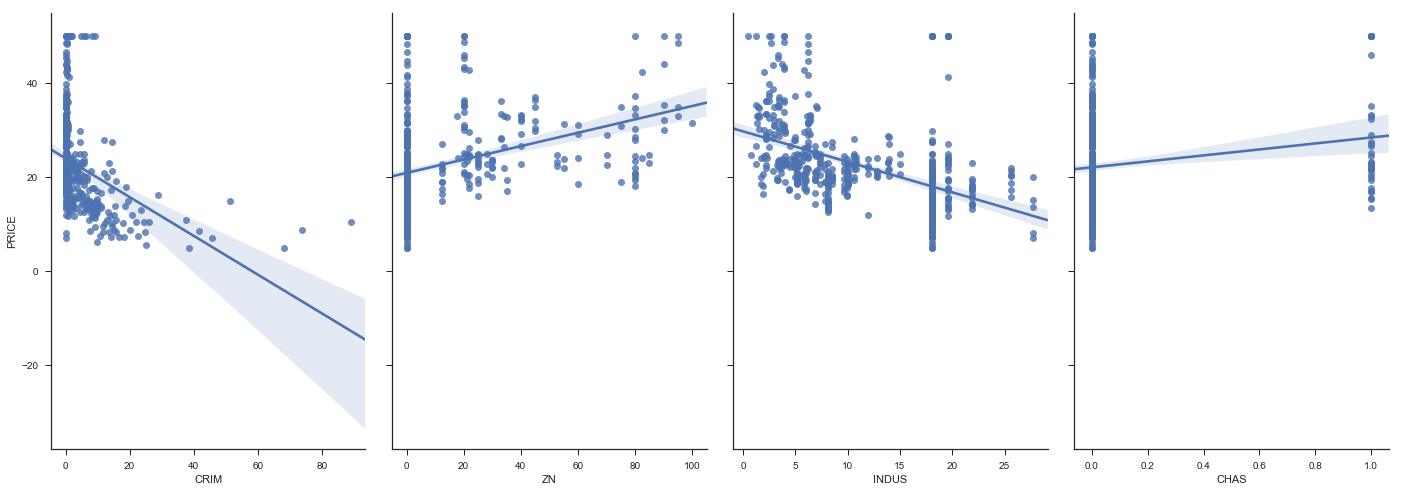

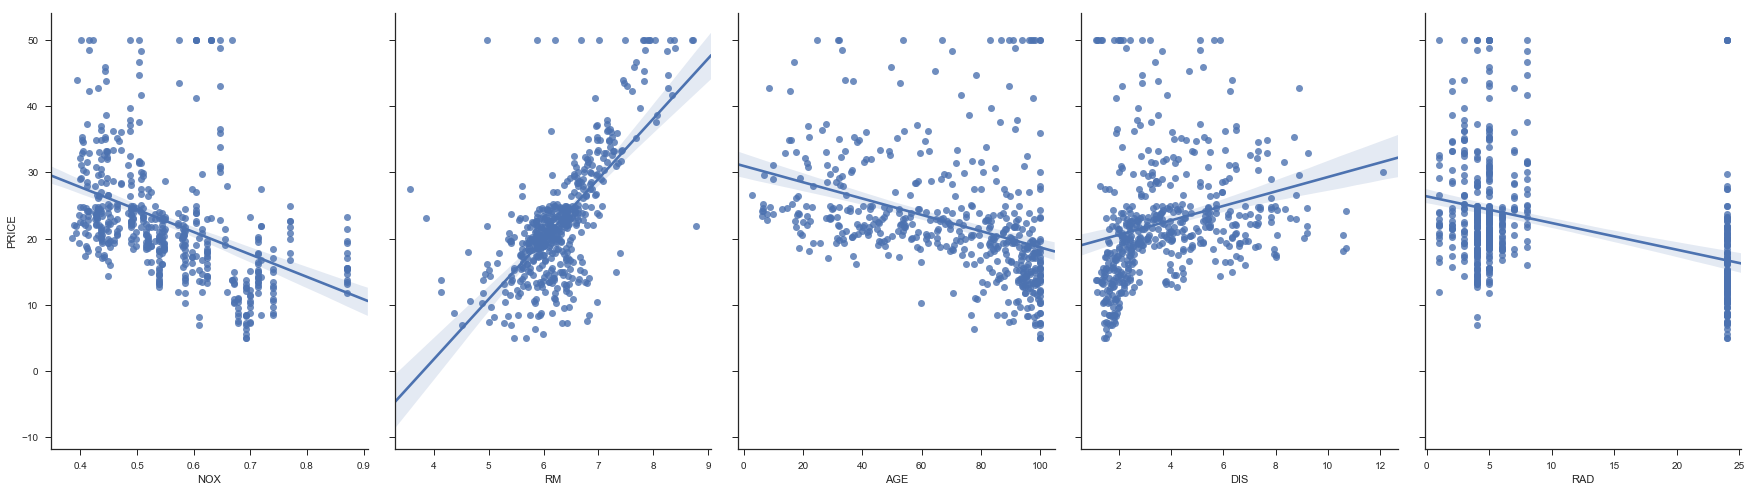

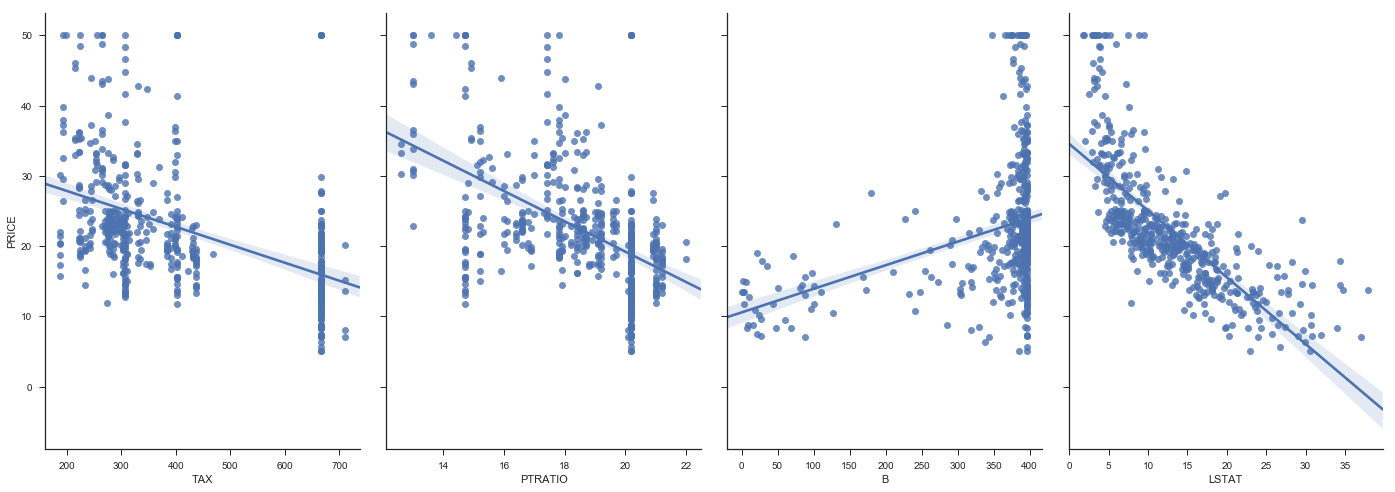

In [15]:
# Step 4: Data Visualization/  Understanding Data (Plot Data)
# Data visualization
from sklearn.linear_model import LinearRegression
#from matplotlib.pyplot import*
#import matplotlib.pyplot as plt
#%matplotlib inline

#plt.scatter(X,Y)
#plt.show()
import seaborn as sns; 
sns.set(style="ticks", color_codes=True)
sns.pairplot(bos,  x_vars=['CRIM', 'ZN', 'INDUS', 'CHAS'], y_vars='PRICE', size=7, aspect=0.7, kind='reg')
sns.pairplot(bos,  x_vars=[ 'NOX', 'RM', 'AGE', 'DIS', 'RAD'], y_vars='PRICE', size=7, aspect=0.7, kind='reg')
sns.pairplot(bos,  x_vars=['TAX', 'PTRATIO', 'B', 'LSTAT'], y_vars='PRICE', size=7, aspect=0.7, kind='reg')

# In the below diagrams RM and LSAT  has most impact on Price, we may discard other columns.  

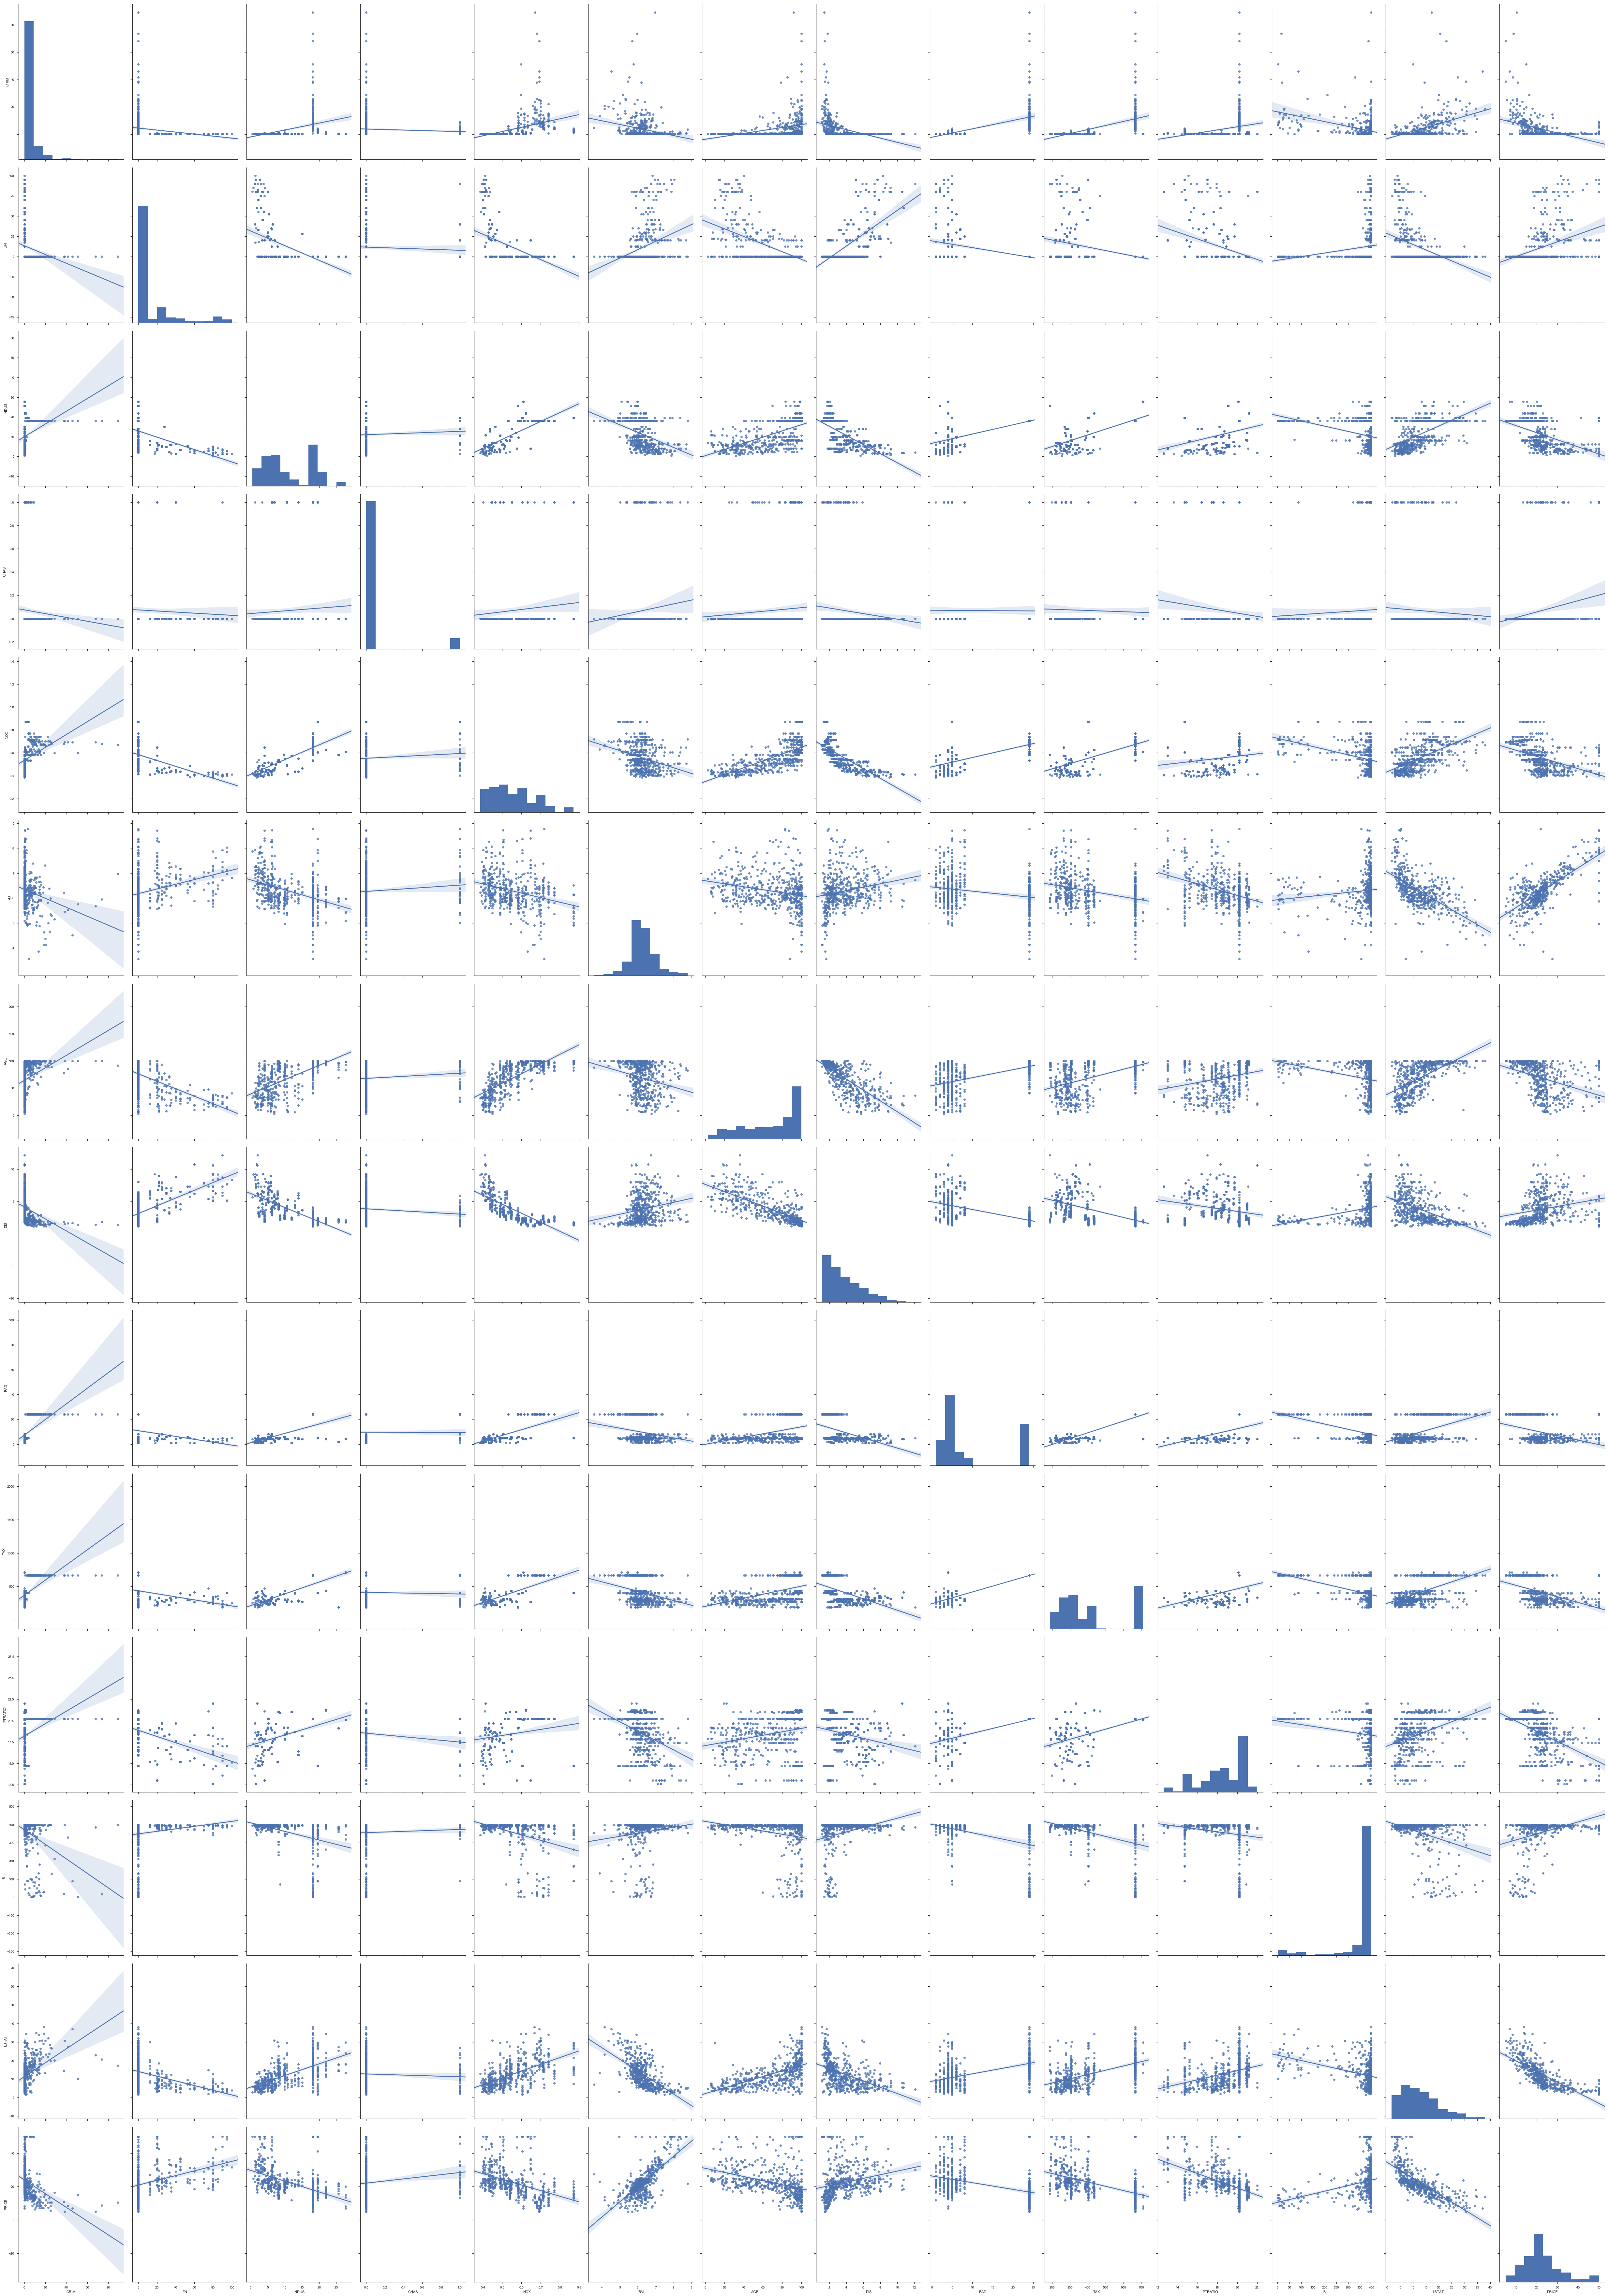

In [16]:
sns.pairplot(bos,size=7, aspect=0.7, kind='reg')
# 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT'

In [17]:
# correlation
pd.set_option('precision',2)
bos.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.00,-0.20,0.40,-5.53e-02,0.42,-0.22,0.35,-0.38,6.22e-01,0.58,0.29,-0.38,0.45,-0.39
ZN,-0.20,1.00,-0.53,-4.27e-02,-0.52,0.31,-0.57,0.66,-3.12e-01,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.40,-0.53,1.00,6.29e-02,0.76,-0.39,0.64,-0.71,5.95e-01,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00e+00,0.09,0.09,0.09,-0.10,-7.37e-03,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,9.12e-02,1.00,-0.30,0.73,-0.77,6.11e-01,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,9.13e-02,-0.30,1.00,-0.24,0.21,-2.10e-01,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,8.65e-02,0.73,-0.24,1.00,-0.75,4.56e-01,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-9.92e-02,-0.77,0.21,-0.75,1.00,-4.95e-01,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.62,-0.31,0.60,-7.37e-03,0.61,-0.21,0.46,-0.49,1.00e+00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-3.56e-02,0.67,-0.29,0.51,-0.53,9.10e-01,1.00,0.46,-0.44,0.54,-0.47


In [18]:
## Step 6: Train_Test_Split
# Now, we can finally split the dataset into train and test with the snippet below.

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

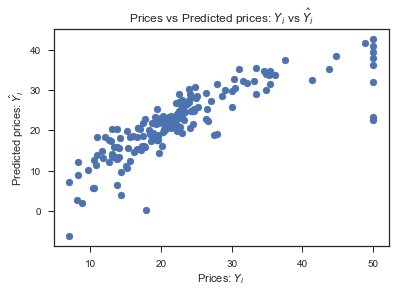

In [19]:
# Step 7: Train Model
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

# Step 8: Predict Output
Y_pred = lm.predict(X_test)

# Step 9: Test Model
plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

The above Code will fit a model based on X_train and Y_train. Now we already got the linear model, we try to predict it to the X_test and now we got the prediction values which stored into Y_pred. To visualize the differences between actual prices and predicted values we also create a scatter plot.

Ideally, the scatter plot should create a linear line. Since the model does not fit 100%, the scatter plot is not creating a linear line.

##### Mean Squared Error
To check the level of error of a model, we can Mean Squared Error. It is one of the procedure to measures the average of the squares of error. Basically, it will check the difference between actual value and the predicted value. For the full theory, you can always search it online. To use it, we can use the mean squared error function of scikit-learn by running this snippet of code.

In [20]:
# Step 10: Model Evaluation
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
mse

28.541367275619

Mean Square Error is very high,  that means that the model isn’t a really great linear model.

In [21]:
# Step 10: Model Evaluation --
# coefficient of determination == R Square 
sklearn.metrics.r2_score(Y_test, Y_pred)

0.695538800550634

R Square is low i.e. and away from 1,  that means that the model isn’t a really great linear model. 

In [22]:
## Step 6: Train_Test_Split
# Now, we can finally split the dataset into train and test with the snippet below.
# Lets take 2 variable in X_Train and Y_Train since it has good co-relationship i.e RM = 0.7 and LSTAT = -0.74 (negative)
#X[['RM','LSTAT']]
#type(X)

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X[['RM','LSTAT']], Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 2)
(167, 2)
(339,)
(167,)


Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

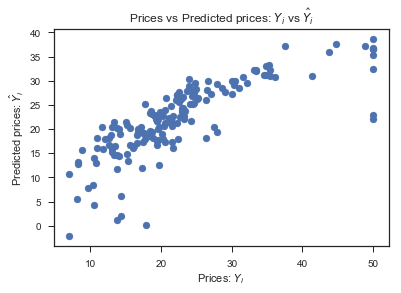

In [23]:
# Step 7: Train Model
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

# Step 8: Predict Output
Y_pred = lm.predict(X_test)

# Step 9: Test Model
plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [24]:
# Step 10: Model Evaluation
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
mse

34.719491239643084

In [25]:
# Step 10: Model Evaluation --
# coefficient of determination == R Square 
sklearn.metrics.r2_score(Y_test, Y_pred)

0.6296344935050335

Even after choosing 2 parameters, it seems this is not best fit for linear regression. This is the conclusion